In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

# Image Classification: Fashion MNIST

The Fashion MNIST dataset is a large freely available database of fashion images that is commonly used for training and testing various machine learning systems. Fashion-MNIST was intended to serve as a replacement for the original MNIST database for benchmarking machine learning algorithms, as it shares the same image size, data format and the structure of training and testing splits.

The dataset contains 70,000 28x28 grayscale images of fashion products from 10 categories from a dataset of Zalando article images, with 7,000 images per category. The training set consists of 60,000 images and the test set consists of 10,000 images. The dataset is commonly included in standard machine learning libraries. (Source: [Wikipedia](https://en.wikipedia.org/wiki/Fashion_MNIST))

The classes are:

| Label | Description |
|-----|-----|
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

## Objective

The goal here is to simply build and fit the best convolutional neural network that you can to correctly classify these image instances. Describe your process and choices as you go, and include an evaluation of your model's performance.

In [3]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.

print(X_train.shape)
print(X_test.shape)

4422102/4422102 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)


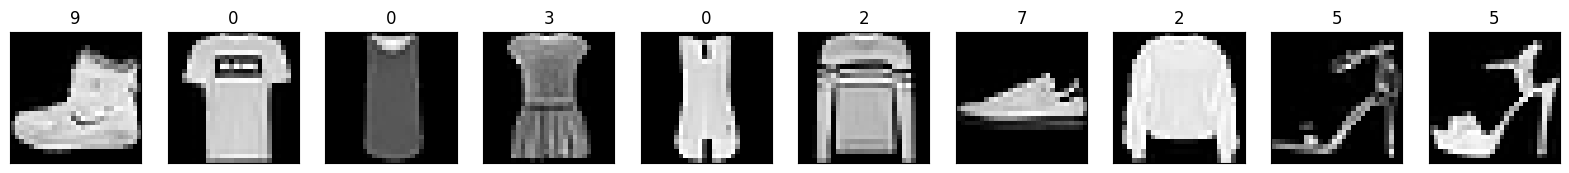

In [4]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_train[i])
    plt.title(f'{y_train[i]}')
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

In [6]:
img_input = tf.keras.layers.Input(shape = (28,28,1))

In [8]:
conv1 = layers.Conv2D(7,2,activation = 'relu')(img_input) #0 for negative, to infinity for positive
pooling = layers.AveragePooling2D(2)(conv1) #takes avg value of pool, the
#dimension is the shape of your data, what are you trying to model?
#4 is the window length
#stride=1 as the default
dropout=tf.keras.layers.Dropout(0.4)(pooling)
#40% of neurons will be set to 0(randomly)60% are active
flatten=tf.keras.layers.Flatten()(dropout)

dense=layers.Dense(100 ,activation ='relu')(flatten)

output = layers.Dense(10, activation='softmax')(dense)

In [9]:
model = tf.keras.Model(img_input, output)

In [10]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = tf.keras.optimizers.RMSprop(),
    metrics = [tf.keras.metrics.CategoricalAccuracy()]
)